In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
df = pd.read_csv('C:/Users/zhuo/Desktop/HW1/employee_attrition.csv')
df.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [3]:
columns_to_drop = ['id','Over18','EmployeeCount','StandardHours']
df = df.drop(columns_to_drop, axis=1)
# df = df.dropna()

In [4]:
le = LabelEncoder()
encoder = OneHotEncoder()
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['Gender'] = le.fit_transform(df['Gender'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['OverTime'] = le.fit_transform(df['OverTime'])
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,36,1,599,1,24,3,3,4,1,42,...,2,1,10,2,3,10,0,7,8,0
1,35,2,921,2,8,3,4,1,1,46,...,4,1,4,3,3,4,2,0,3,0
2,32,2,718,2,26,3,2,3,1,80,...,4,2,4,3,3,3,2,1,2,0
3,38,2,1488,1,2,3,3,3,0,40,...,3,0,15,1,1,6,0,0,2,0
4,50,2,1017,1,5,4,3,2,0,37,...,3,0,31,0,3,31,14,4,10,1


In [23]:
train_data = df.iloc[:, :-1]
train_target = df.iloc[:, -1]
df["AbsMonthlyRate"] = df["MonthlyRate"] - df["MonthlyIncome"]


def feature_risk(df):
    df["risk_factors"] = df[[
    "MonthlyIncome", "BusinessTravel", "Age", "Education", "JobSatisfaction", 
    "StockOptionLevel","YearsWithCurrManager", "YearsSinceLastPromotion",
    "PercentSalaryHike", "OverTime"
    ]].apply(
        lambda x: \
        0 + (1 if x.MonthlyIncome < 3000 else 0) + \
        (1 if x.BusinessTravel == 1 else 0) + \
        (1 if x.Education == 1 else 0) + \
        (1 if x.StockOptionLevel == 0 else 0) + \
        (1 if x.YearsSinceLastPromotion == 0 else 0) + \
        (1 if x.YearsWithCurrManager == 0 else 0) + \
        (1 if x.Age <40 and x.Age> 25 else 0) + \
        (1 if x.PercentSalaryHike < 16 else 0) + \
        (1 if x.JobSatisfaction == 1 or x.JobSatisfaction == 2 else 0) + \
        (1 if x.OverTime == 1 else 0),
        axis = 1
    )
    return df


train_data = feature_risk(train_data)

df = feature_risk(df)




X_train, X_test, y_train, y_test = train_test_split(train_data, train_target, test_size=0.2, random_state=13)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=13)
X_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,AbsMonthlyRate,risk_factors
518,40,2,1265,2,7,4,1,2,1,78,...,15,2,2,3,2,0,1,0,19136,2
1423,42,2,1328,1,28,3,4,4,1,30,...,10,3,1,9,8,0,8,0,10289,2
1102,50,2,317,1,1,2,3,4,0,85,...,5,2,3,3,1,0,0,0,17032,3
822,32,2,989,1,1,3,1,2,1,78,...,9,2,3,8,6,4,8,0,1844,2
840,24,2,1297,2,3,2,3,4,0,60,...,5,3,3,5,3,0,4,0,3693,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,39,2,1131,2,2,3,1,4,0,79,...,21,3,3,21,6,3,14,0,9209,3
1552,25,2,881,1,1,2,1,4,1,42,...,6,2,3,3,2,0,2,0,-1360,1
74,53,2,1018,1,3,3,3,4,0,95,...,26,3,3,5,4,1,2,0,-9309,1
176,38,2,326,2,2,3,1,4,0,99,...,15,3,2,4,2,1,3,0,18545,3


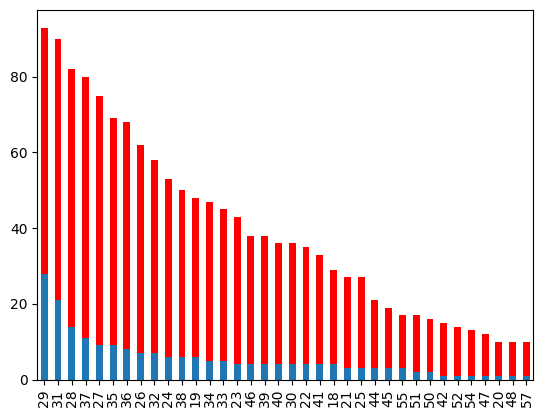

In [6]:
attrition_data = df[df["Attrition"]==0]
no_attrition_data = df[df["Attrition"]==1]

counts_attrition = attrition_data["Age"].value_counts()
counts_no_attrition = no_attrition_data["Age"].value_counts()
counts_attrition.plot(kind='bar',color='red')
counts_no_attrition.plot(kind='bar')
plt.show()


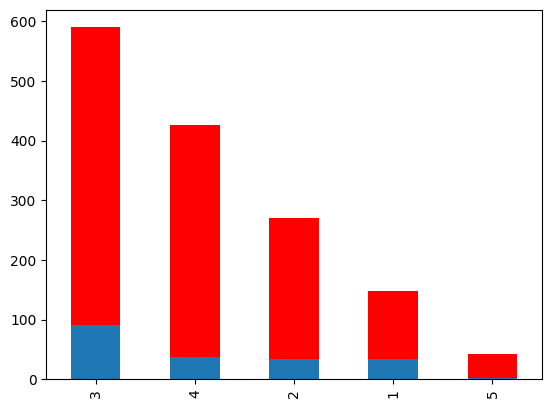

In [7]:
counts_attrition = attrition_data["Education"].value_counts()
counts_no_attrition = no_attrition_data["Education"].value_counts()
counts_attrition.plot(kind='bar',color='red')
counts_no_attrition.plot(kind='bar')
plt.show()

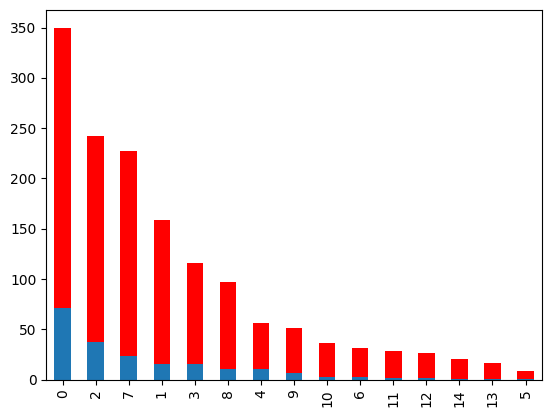

In [8]:
counts_attrition = attrition_data["YearsWithCurrManager"].value_counts()
counts_no_attrition = no_attrition_data["YearsWithCurrManager"].value_counts()
counts_attrition.plot(kind='bar',color='red')
counts_no_attrition.plot(kind='bar')
plt.show()

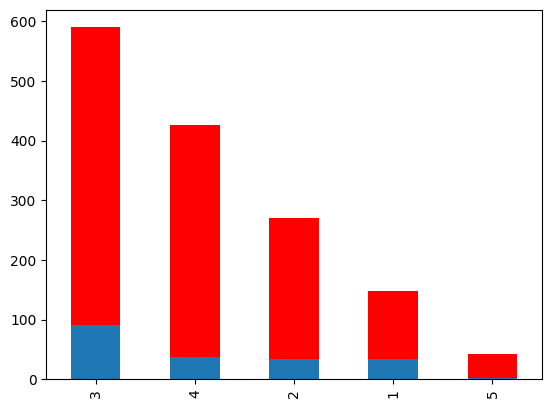

In [9]:
counts_attrition = attrition_data["Education"].value_counts()
counts_no_attrition = no_attrition_data["Education"].value_counts()
counts_attrition.plot(kind='bar',color='red')
counts_no_attrition.plot(kind='bar')
plt.show()

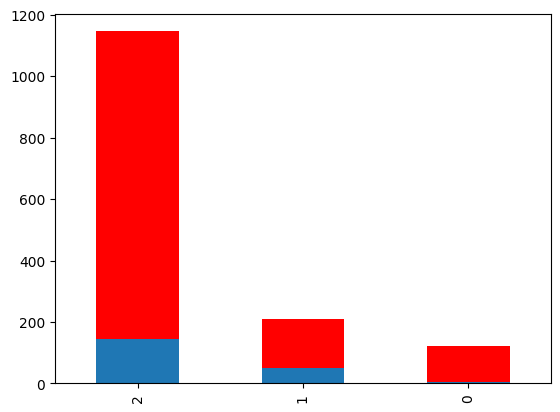

In [10]:
counts_attrition = attrition_data["BusinessTravel"].value_counts()
counts_no_attrition = no_attrition_data["BusinessTravel"].value_counts()
counts_attrition.plot(kind='bar',color='red')
counts_no_attrition.plot(kind='bar')
plt.show()

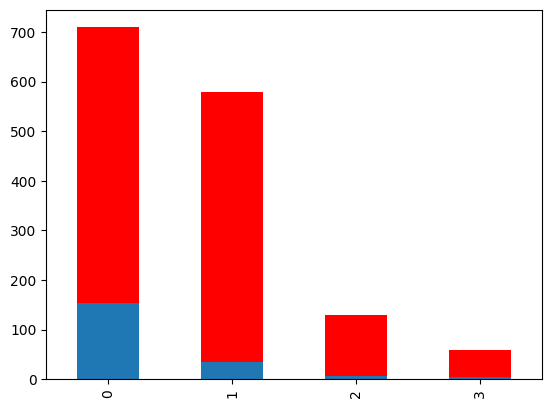

In [11]:
counts_attrition = attrition_data["StockOptionLevel"].value_counts()
counts_no_attrition = no_attrition_data["StockOptionLevel"].value_counts()
counts_attrition.plot(kind='bar',color='red')
counts_no_attrition.plot(kind='bar')
plt.show()

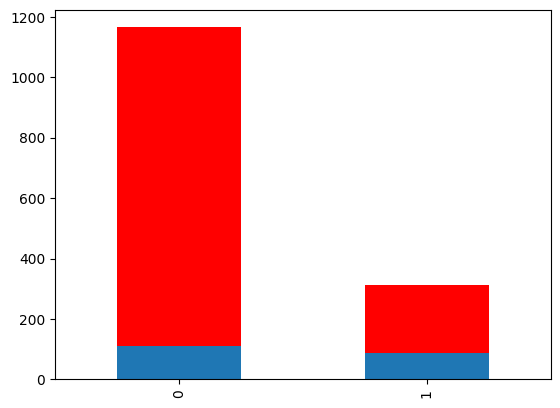

In [12]:
counts_attrition = attrition_data["OverTime"].value_counts()
counts_no_attrition = no_attrition_data["OverTime"].value_counts()
counts_attrition.plot(kind='bar',color='red')
counts_no_attrition.plot(kind='bar')
plt.show()

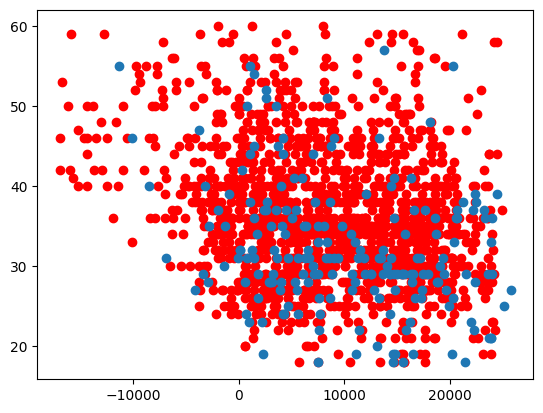

In [13]:
plt.scatter(attrition_data["AbsMonthlyRate"], attrition_data["Age"],color='red')
plt.scatter(no_attrition_data["AbsMonthlyRate"], no_attrition_data["Age"])
plt.show()

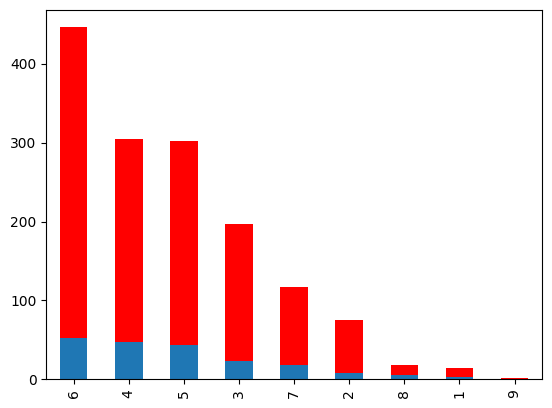

In [14]:
counts_attrition = attrition_data["risk_factors"].value_counts()
counts_no_attrition = no_attrition_data["risk_factors"].value_counts()
counts_attrition.plot(kind='bar',color='red')
counts_no_attrition.plot(kind='bar')
plt.show()

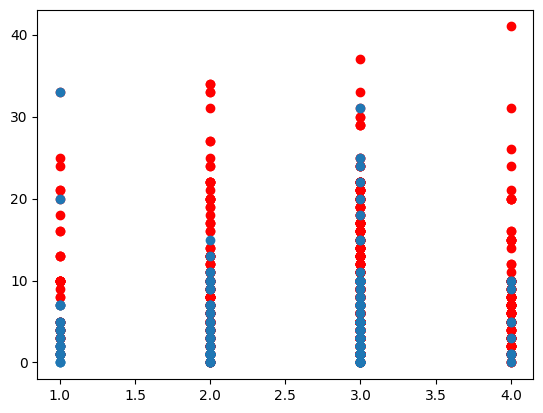

In [15]:
plt.scatter(attrition_data["JobInvolvement"], attrition_data["YearsAtCompany"],color='red')
plt.scatter(no_attrition_data["JobInvolvement"], no_attrition_data["YearsAtCompany"])
plt.show()

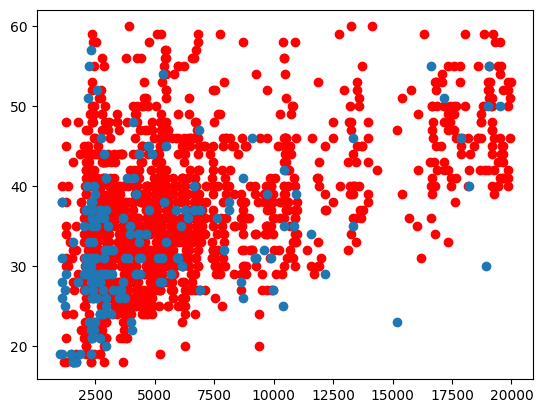

In [16]:
plt.scatter(attrition_data["MonthlyIncome"], attrition_data["Age"],color='red')
plt.scatter(no_attrition_data["MonthlyIncome"], no_attrition_data["Age"])
plt.show()

In [17]:
def printcount(x):
    count = 0
    for i in x:
        if i == 1:
            count+=1
    return count

In [18]:
param_grid = {
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_leaf": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "criterion": ["gini", "entropy"]
}
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_val, y_val)
print(grid_search.best_params_)

{'criterion': 'gini', 'min_samples_leaf': 10, 'min_samples_split': 2}


In [22]:
# class_weight={0:1, 1:1, 2:1, 3:1, 4:1,
#              5:1, 6:1, 7:1, 8:1, 9:1,
#              10:1, 11:1, 12:1, 13:1, 14:1,
#              15:1, 16:1, 17:1, 18:1, 19:1,
#              20:1, 21:1, 22:1, 23:1, 24:1,
#              25:1, 26:1, 26:1, 28:1, 29:1, 30:1}

# clf = DecisionTreeClassifier(class_weight=class_weight, random_state=42, min_samples_split=2, min_samples_leaf = 3)
clf = DecisionTreeClassifier(random_state=42,criterion="gini",min_samples_split=2, min_samples_leaf = 10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
# print("Attrition: #pred: {}, #acl: {}".format(printcount(y_pred),printcount(y_test)))
print("Accuracy: {:.2f}%".format(acc * 100))

Attrition: #pred: 14, #acl: 26
Accuracy: 85.71%
